# My Titanic competition attempt wit score 0.78708

I\`m a beginner, so I\'m only studying. And I like to larn new things by doing something. So this is a result of my attempts on Titanic competition. Still need to learn a lot of things, but already something achieved.

In [1]:
# importing all libraries/classes that will be used in my solution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Let\`s create a DataFrame for our training data and get familiar a bit with its content.

In [2]:
training_file = r"/kaggle/input/titanic/train.csv"
df = pd.read_csv(training_file,index_col = "PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems to me that "Ticket" and "Cabin" should not be influential in this case as thi is an information about ticket system and ship, not about people.

And I should check if "Fare" and "Pclass" have some correlations. I assume that they have and there fore the one that less influential (has less correlation with "Survived") should be dropped.

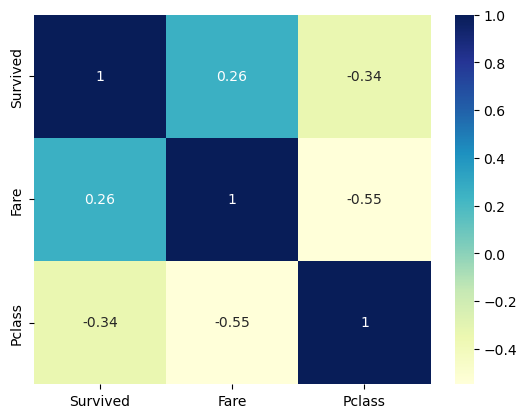

In [3]:
features = ["Survived","Fare", "Pclass"]
dataplot = sns.heatmap(df[features].corr(), cmap="YlGnBu", annot=True)

Let\'s summarize information on family members in total column "Relatives" and transform data in "Sex" and "Embarked" columns  so that all columns (except "Name") will have numerical data.

And we should check correlations on other features.

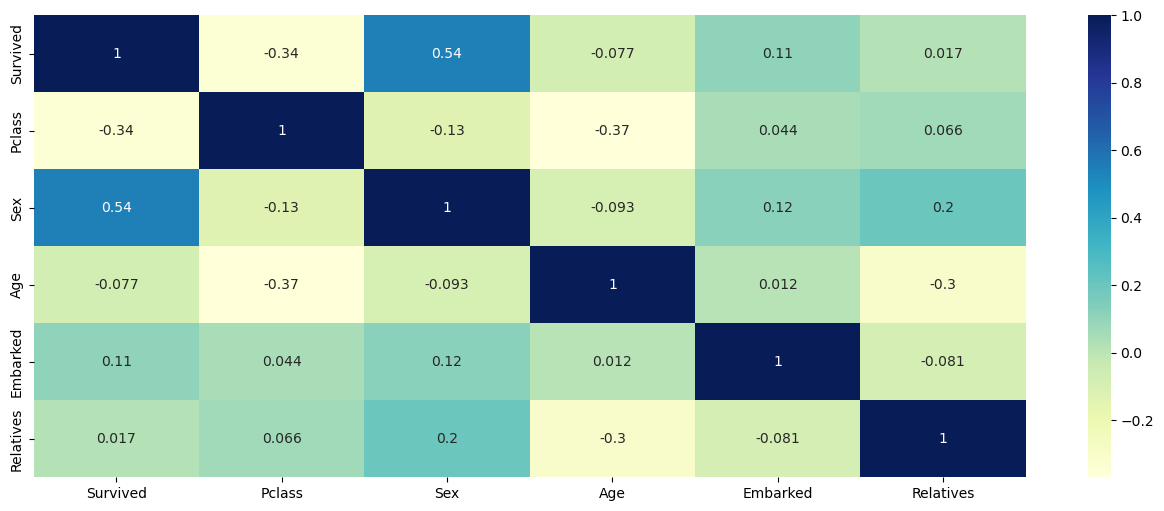

In [4]:
df["Relatives"] = df['SibSp']+df['Parch']
# df["Alone"] = [1 if relatives == 0 else 0 for relatives in df["Relatives"]]
df['Sex'] = df['Sex'].replace(['male'], 0)
df['Sex'] = df['Sex'].replace(['female'], 1)
df['Embarked'] = df['Embarked'].replace(['S'], 0)
df['Embarked'] = df['Embarked'].replace(['C'], 1)
df['Embarked'] = df['Embarked'].replace(['Q'], 2)

df= df.drop(["Fare","SibSp","Parch",'Ticket','Cabin'],axis = 1)

plt.figure(figsize=(16,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Well, "Sex" has high correlation with chances to survive. I assume that women had higher chances. Therefore we should this info.

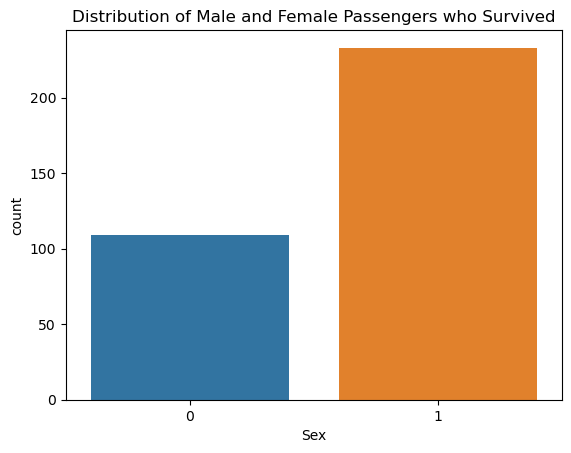

In [5]:
# 0 - men, 1 - women

survived_df = df[df['Survived'] == 1]

# plot the count of male and female passengers who survived
sns.countplot(x='Sex', data=survived_df)

plt.title('Distribution of Male and Female Passengers who Survived')
plt.show()

Yes, women had higher chances to survive. But what about men? How can we distinguish men in some groups that had different chances to survive? It seems that names shoul be checked. There are different titles in "Names" column (like Mr., Mrs., and others)

In [6]:
titles_set = set()
for name in df["Name"]:
    name_list = name.split(" ")
    for part in name_list:
        if part.endswith("."):
            titles_set.add(part)
print(titles_set)

{'Mrs.', 'Lady.', 'Jonkheer.', 'Mlle.', 'Rev.', 'Mr.', 'Sir.', 'Miss.', 'Capt.', 'Major.', 'Don.', 'Dr.', 'Ms.', 'Mme.', 'Countess.', 'L.', 'Master.', 'Col.'}


So we have different titles. Some of them belong to ladies and some to gentlemen of different social status. Let's distinguish ordinary "Mr." from all other people. It seems that ordinary people and nobilities/officers could have different chances to survive.

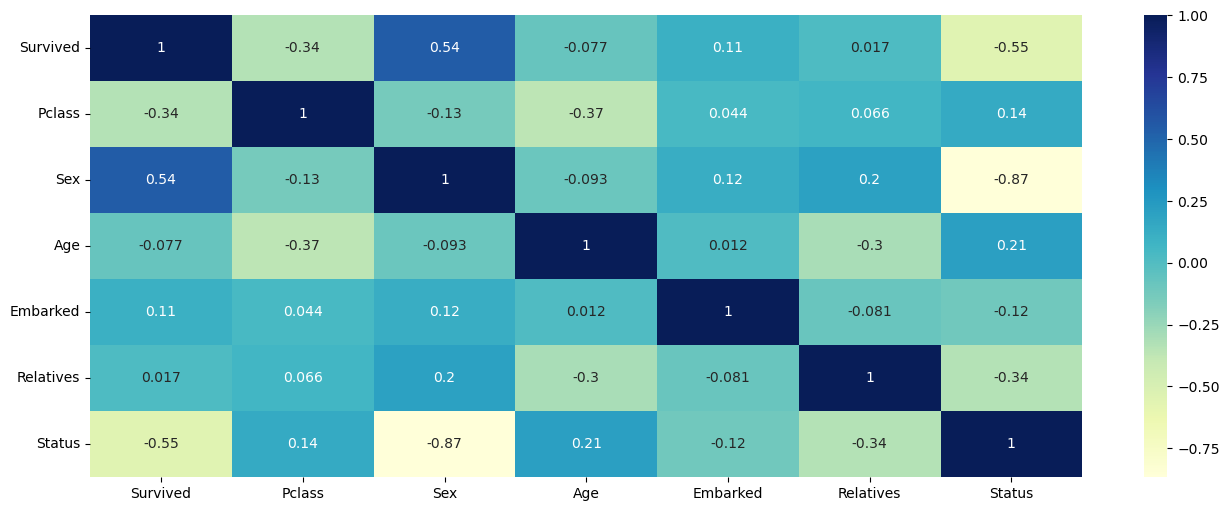

In [7]:
df['Status'] = 0
for ind in df.index.values:
    if "Mr." in df.loc[ind,'Name']:
        df.loc[ind,"Status"] = 1
plt.figure(figsize=(16,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [8]:
# Name doesn`t have any valuable data, so it sould be dropped
df = df.drop(['Name'],axis =1)

#let`s fill NaN values with median
for col in df:
    if df[col].isnull().values.any() ==True:
        df[col] = df[col].fillna(df[col].median())

Let\`s assign our features and target 

In [9]:
features = ["Sex","Pclass","Age","Relatives","Status","Embarked"]
X=df[features]
y= df['Survived']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

Here we will tune our hyperparameters for LogisticRegression model. It seems that there will be some warnings during tuning, but it should be OK.

In [10]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'max_iter': [100, 500, 1000,5000,10000]
}
# create the logistic regression model
model = LogisticRegression()

# create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# print the best hyperparameters and their score
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print("Best Score:", grid_search.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Best Hyperparameters: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8143642688811582


Here we\`ll train our model using tuned hyperparameters

In [11]:
lr = LogisticRegression(**best_params)
lr.fit(train_X, train_y)

LogisticRegression(C=1, max_iter=5000, solver='saga')

And after all  - load *test.csv* and perform all mentioned above transformations on test dataset and create our submission.

In [12]:
test_file = r"/kaggle/input/titanic/test.csv"
df_test = pd.read_csv(test_file)
df_test=df_test.set_index("PassengerId")
df_test["Relatives"] = df_test['SibSp']+df_test['Parch']
# df["Alone"] = [1 if relatives == 0 else 0 for relatives in df["Relatives"]]
df_test['Sex'] = df_test['Sex'].replace(['male'], 0)
df_test['Sex'] = df_test['Sex'].replace(['female'], 1)
df_test['Embarked'] = df_test['Embarked'].replace(['S'], 0)
df_test['Embarked'] = df_test['Embarked'].replace(['C'], 1)
df_test['Embarked'] = df_test['Embarked'].replace(['Q'], 2)

df_test= df_test.drop(["Fare","SibSp","Parch",'Ticket','Cabin'],axis = 1)

titles_set = set()
for name in df_test["Name"]:
    name_list = name.split(" ")
    for part in name_list:
        if part.endswith("."):
            titles_set.add(part)

df_test['Status'] = 0
for ind in df_test.index.values:
    if "Mr." in df_test.loc[ind,'Name']:
        df_test.loc[ind,"Status"] = 1
        
df = df_test.drop(['Name'],axis =1)
for col in df_test:
    if df_test[col].isnull().values.any() ==True:
        df_test[col] = df_test[col].fillna(df_test[col].median())
        
features = ["Sex","Pclass","Age","Relatives","Status","Embarked"]
X=df_test[features]
test_preds = lr.predict(X)
output = pd.DataFrame({'PassengerId': df_test.index.values,
                       'Survived': test_preds})
output.to_csv(r"submission.csv", index=False)